<a href="https://colab.research.google.com/github/mrtkp9993/QuantitaveFinanceExamplesPy/blob/main/03_principal_component_analysis_on_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from sklearn.decomposition import PCA

pd.set_option("use_inf_as_na", True)

<IPython.core.display.Javascript object>

In [4]:
bist30h = [
    "TUPRS.IS",
    "VAKBN.IS",
    "KRDMD.IS",
    "DOHOL.IS",
    "AKBNK.IS",
    "TKFEN.IS",
    "FROTO.IS",
    "GARAN.IS",
    "KOZAA.IS",
    "HALKB.IS",
    "TCELL.IS",
    "KOZAL.IS",
    "VESTL.IS",
    "YKBNK.IS",
    "TTKOM.IS",
    "BIMAS.IS",
    "PETKM.IS",
    "SISE.IS",
    "ARCLK.IS",
    "EREGL.IS",
    "SASA.IS",
    "SAHOL.IS",
    "EKGYO.IS",
    "THYAO.IS",
    "PGSUS.IS",
    "ISCTR.IS",
    "KCHOL.IS",
    "ASELS.IS",
    "TAVHL.IS",
    "GUBRF.IS",
]

<IPython.core.display.Javascript object>

In [5]:
df = yf.download(tickers=" ".join(bist30h), period="max", start="2013-02-01")

df.clip(lower=0, inplace=True)
df.fillna(0, inplace=True)
df = df["Adj Close"]

[*********************100%***********************]  30 of 30 completed


<IPython.core.display.Javascript object>

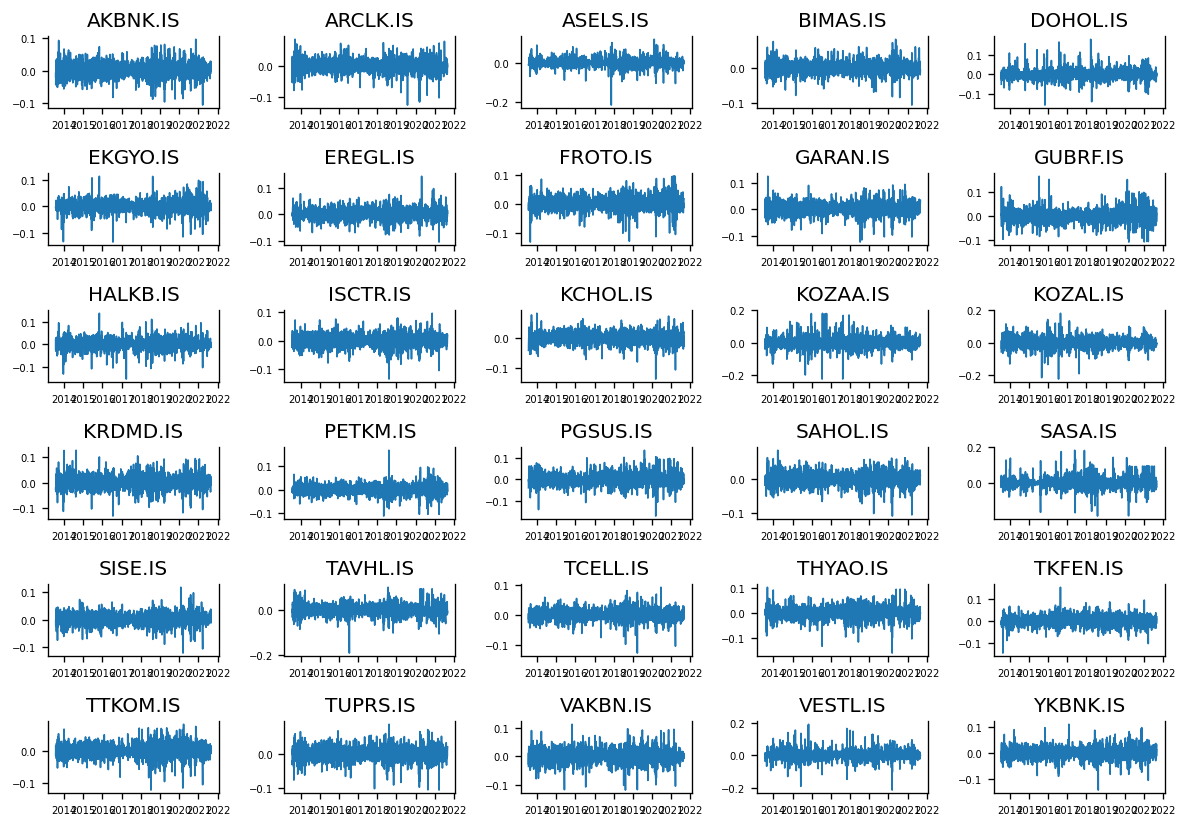

<IPython.core.display.Javascript object>

In [6]:
# Returns
df_ret = (np.log(df) - np.log(df.shift(1))).dropna()

fig, axes = plt.subplots(nrows=6, ncols=5, dpi=120, figsize=(10, 7))
for i, ax in enumerate(axes.flatten()):
    data = df_ret[df_ret.columns[i]]
    ax.plot(data, linewidth=1)
    ax.set_title(df_ret.columns[i])
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

In [7]:
df_ret.describe()

,AKBNK.IS,ARCLK.IS,ASELS.IS,BIMAS.IS,DOHOL.IS,EKGYO.IS,EREGL.IS,FROTO.IS,GARAN.IS,GUBRF.IS,...,SISE.IS,TAVHL.IS,TCELL.IS,THYAO.IS,TKFEN.IS,TTKOM.IS,TUPRS.IS,VAKBN.IS,VESTL.IS,YKBNK.IS
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,...,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,0.000012,0.000548,0.000951,0.000677,0.000529,-0.000050,0.001533,0.001053,0.000182,0.001329,...,0.000829,0.000491,0.000430,0.000213,0.000511,0.000173,0.000611,-0.000062,0.001248,0.000007
std,0.021380,0.020049,0.021373,0.016457,0.025540,0.021487,0.020701,0.022567,0.022643,0.026586,...,0.020299,0.023657,0.017600,0.023437,0.022287,0.020340,0.019147,0.022868,0.029938,0.020976
min,-0.104985,-0.125868,-0.214952,-0.105360,-0.156843,-0.134454,-0.105089,-0.131401,-0.123981,-0.107030,...,-0.120095,-0.190463,-0.128149,-0.161870,-0.148194,-0.120871,-0.105250,-0.117141,-0.215497,-0.140286
25%,-0.011992,-0.010387,-0.009198,-0.008027,-0.012903,-0.010811,-0.010427,-0.010508,-0.012423,-0.011669,...,-0.010292,-0.012281,-0.008850,-0.012027,-0.011788,-0.010152,-0.009699,-0.011891,-0.012481,-0.011224
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.011429,0.011222,0.010087,0.008994,0.012423,0.011091,0.013316,0.013265,0.012544,0.013129,...,0.012384,0.012992,0.009870,0.012970,0.013778,0.010566,0.010791,0.012632,0.014085,0.011662
max,0.096114,0.088479,0.121545,0.082469,0.178483,0.113455,0.144163,0.095310,0.124012,0.166084,...,0.115769,0.102228,0.092234,0.103436,0.153290,0.082997,0.087237,0.111352,0.189382,0.109589


<IPython.core.display.Javascript object>

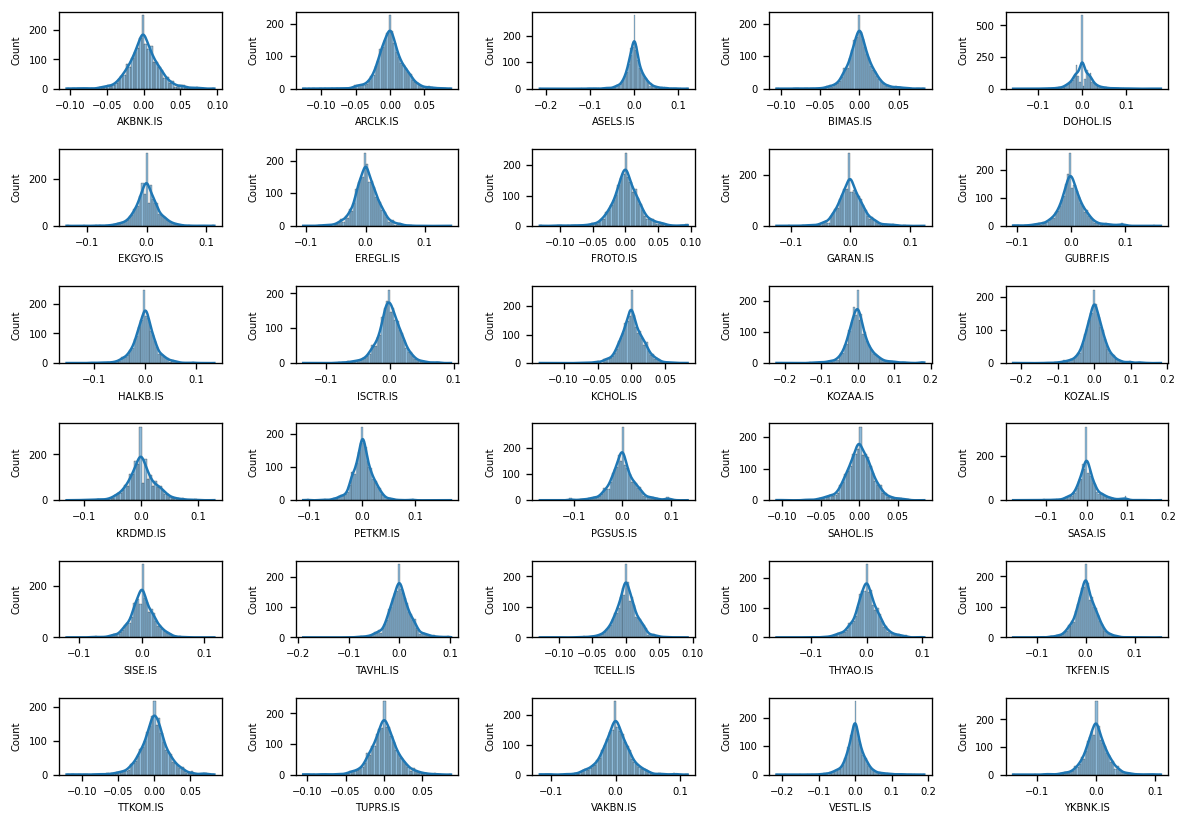

<IPython.core.display.Javascript object>

In [8]:
plt.rcParams["axes.labelsize"] = 6
plt.rcParams["xtick.labelsize"] = 6
plt.rcParams["ytick.labelsize"] = 6

fig, axes = plt.subplots(nrows=6, ncols=5, dpi=120, figsize=(10, 7))
for i, ax in enumerate(axes.flatten()):
    data = df_ret[df_ret.columns[i]]
    sns.histplot(data, ax=ax, kde=True)
plt.tight_layout()

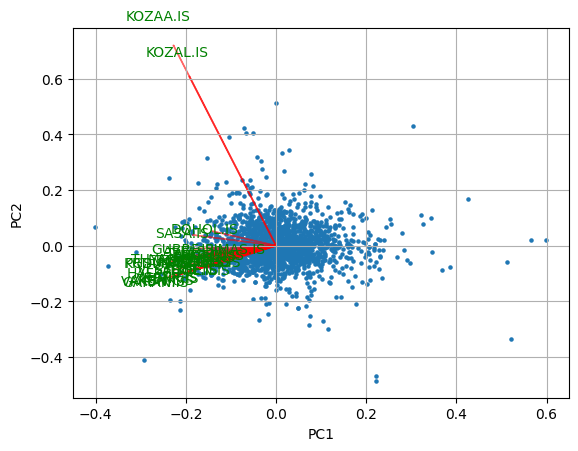

<IPython.core.display.Javascript object>

In [9]:
# https://ostwalprasad.github.io/machine-learning/PCA-using-python.html
plt.style.use("default")

pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(df_ret)


def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color="r", alpha=0.5)
        if labels is None:
            plt.text(
                coeff[i, 0] * 1.15,
                coeff[i, 1] * 1.15,
                "Var" + str(i + 1),
                color="green",
                ha="center",
                va="center",
            )
        else:
            plt.text(
                coeff[i, 0] * 1.15,
                coeff[i, 1] * 1.15,
                labels[i],
                color="g",
                ha="center",
                va="center",
            )

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


myplot(pca[:, 0:2], np.transpose(pcamodel.components_[0:2, :]), list(df_ret.columns))
plt.show()